In [1]:
# We need the following libraries to carry out the activities

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
users_data = pd.read_pickle("../data/users_data_cleaned.pkl")

# read the data cleaned after eda

In [3]:
# preview the data

users_data.head()

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8


In [4]:
# check shape of data

users_data.shape

(45179, 33)

In [5]:
# check the structure of the data - make sure all the columns are float, into and bool (apart from user_id)

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null 

## Define the target

In [6]:
# Definition: The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding.

# Look at the distribution of term_deposit

users_data.term_deposit.value_counts(normalize = True)

False    0.883021
True     0.116979
Name: term_deposit, dtype: float64

In [7]:
# The data is slightly imbalanced, with only 12% of users having churned - will oversample the data

## Split data into target and features

In [8]:
# define the target and features
# A supervised machine learning algorithm requires both - uses historical data to uncover relationships between other features of your dataset and the target.

target_data = users_data.term_deposit
features = users_data.drop(["user_id", "term_deposit"], axis = 1)
    

## Split data into train and test set

In [9]:
# using this handy function from scikit-learm to split the data into a training and test dataset
# we can adjust the test size to our needs, but it's best practise to train the model on 70 - 80% of the data

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target_data,
                                                test_size = 0.3, 
                                                random_state = 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target_data,
                                                    test_size = 0.3,
                                                    )

In [11]:
# print the shape of the training data

print("Training Data")
print(X_train.shape)
print(y_train.shape)

Training Data
(31625, 31)
(31625,)


In [12]:
# summarize class distribution

print("Before oversampling: ", Counter(y_train))

Before oversampling:  Counter({False: 27916, True: 3709})


## Apply oversampling techniques

In [13]:
# import SMOTE oversampling 
# For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular
# and influential data sampling algorithms.
# With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement

from imblearn.over_sampling import SMOTE

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
X_train_SMOTE = pd.DataFrame(X_train_SMOTE, columns = X_train.columns) # to keep dataframe structure

# summarize class distribution
print("After oversampling: ", Counter(y_train_SMOTE))

After oversampling:  Counter({False: 27916, True: 27916})


## Check distribution of test data

In [14]:
# print the shape of the test data - we do not oversample the test data

print("\nTest Data")
print(X_test.shape)
print(y_test.shape)


Test Data
(13554, 31)
(13554,)


In [15]:
# check the distribution of the target 

Counter(y_test)

Counter({False: 11978, True: 1576})

## Gradient Descent Based Algorithms

## Logistic Regression

## Scaling the data

In [16]:
# Machine learning algorithms that use gradient descent as an optimization technique require data to be scaled.

# One of the ways to scale the data is using data normalization with sklearn
# fit scaler on training data 

norm = MinMaxScaler().fit(X_train_SMOTE)


In [17]:
# transform training data
X_train_norm = norm.transform(X_train_SMOTE)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

## Training the model

In [18]:
# Import the Logistic Regression model from sklearn

lr = LogisticRegression()

In [19]:
# Fit the model on the scaled training data

lr.fit(X_train_norm, y_train_SMOTE) 

LogisticRegression()

## Making predictions

In [20]:
# Evaluate how well the model predicts on unseen data
# You can make predictions on the test data or normalized data

y_pred = lr.predict(X_test) 
print(Counter(y_pred))

Counter({True: 13475, False: 79})


## Evaluating the model

In [21]:
# We will use accuracy to evaluating the model performance.
# Very simply, accuracy is the fraction of predictions our model got right. 

accuracy_score(y_test, y_pred)

# 12% accuracy, that's very low - let's see if tuning can improve this

0.12210417588903645

In [22]:
# can also print a classification report for ever model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.01      0.01     11978
        True       0.12      1.00      0.21      1576

    accuracy                           0.12     13554
   macro avg       0.56      0.50      0.11     13554
weighted avg       0.90      0.12      0.04     13554



### Naïve Bayes Models

In [23]:
# Naive Bayes Model are insensitive to scaling

## Training the data

In [24]:
gnb = GaussianNB()

In [25]:
gnb.fit(X_train_SMOTE, y_train_SMOTE)

GaussianNB()

## Making predictions

In [26]:
y_pred = gnb.predict(X_test)
print(Counter(y_pred))

Counter({False: 9842, True: 3712})


## Evaluating the model 

In [27]:
accuracy_score(y_test, y_pred)

# 67% accuracy, that's a big improvement from the untuned Logistic Regression Model

0.7076877674487236

In [28]:
# can also print a classification report for ever model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.75      0.82     11978
        True       0.18      0.42      0.25      1576

    accuracy                           0.71     13554
   macro avg       0.54      0.58      0.53     13554
weighted avg       0.82      0.71      0.75     13554



In [29]:
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 13554 points : 3962


### Distance Based Models

## Scaling the data

In [30]:
# Distance algorithms for e.g. KNN and SVM are most affected by the range of features. 
# This is because behind the scenes they are using distances between data points to determine their similarity.

norm = MinMaxScaler().fit(X_train_SMOTE)

In [31]:
# transform training data
X_train_norm = norm.transform(X_train_SMOTE)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

## k-nearest neighbor (KNN)

## Training the data

In [32]:
knn = KNeighborsClassifier()


In [33]:
knn.fit(X_train_SMOTE, y_train_SMOTE)

KNeighborsClassifier()

## Making predictions

In [34]:
y_pred = knn.predict(X_test)
print(Counter(y_pred))

Counter({False: 9855, True: 3699})


## Evaluating the model 

In [35]:
accuracy_score(y_test, y_pred)

0.7585214696768482

In [36]:
# can also print a classification report for ever model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.77      0.85     11978
        True       0.27      0.64      0.38      1576

    accuracy                           0.76     13554
   macro avg       0.61      0.70      0.61     13554
weighted avg       0.86      0.76      0.80     13554



### Decision Trees and Ensemble Models


Tree-based algorithms are fairly insensitive to the scale of the features. A decision tree is only splitting a node based on a single feature. This split on a feature is not influenced by other features.

## Decision Tree


## Training the data

In [37]:
clf_tree = DecisionTreeClassifier()

In [38]:
clf_tree.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

## Making predictions

In [39]:
y_pred = clf_tree.predict(X_test)
print(Counter(y_pred))

Counter({False: 11699, True: 1855})


## Evaluating the model 

In [40]:
accuracy_score(y_test, y_pred)

# Let's see if using ensemble methods e.g. Random Forest and XGBoost improves the accuracy

0.83377600708278

In [41]:
# can also print a classification report for ever model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.89      0.90     11978
        True       0.32      0.37      0.34      1576

    accuracy                           0.83     13554
   macro avg       0.62      0.63      0.62     13554
weighted avg       0.85      0.83      0.84     13554



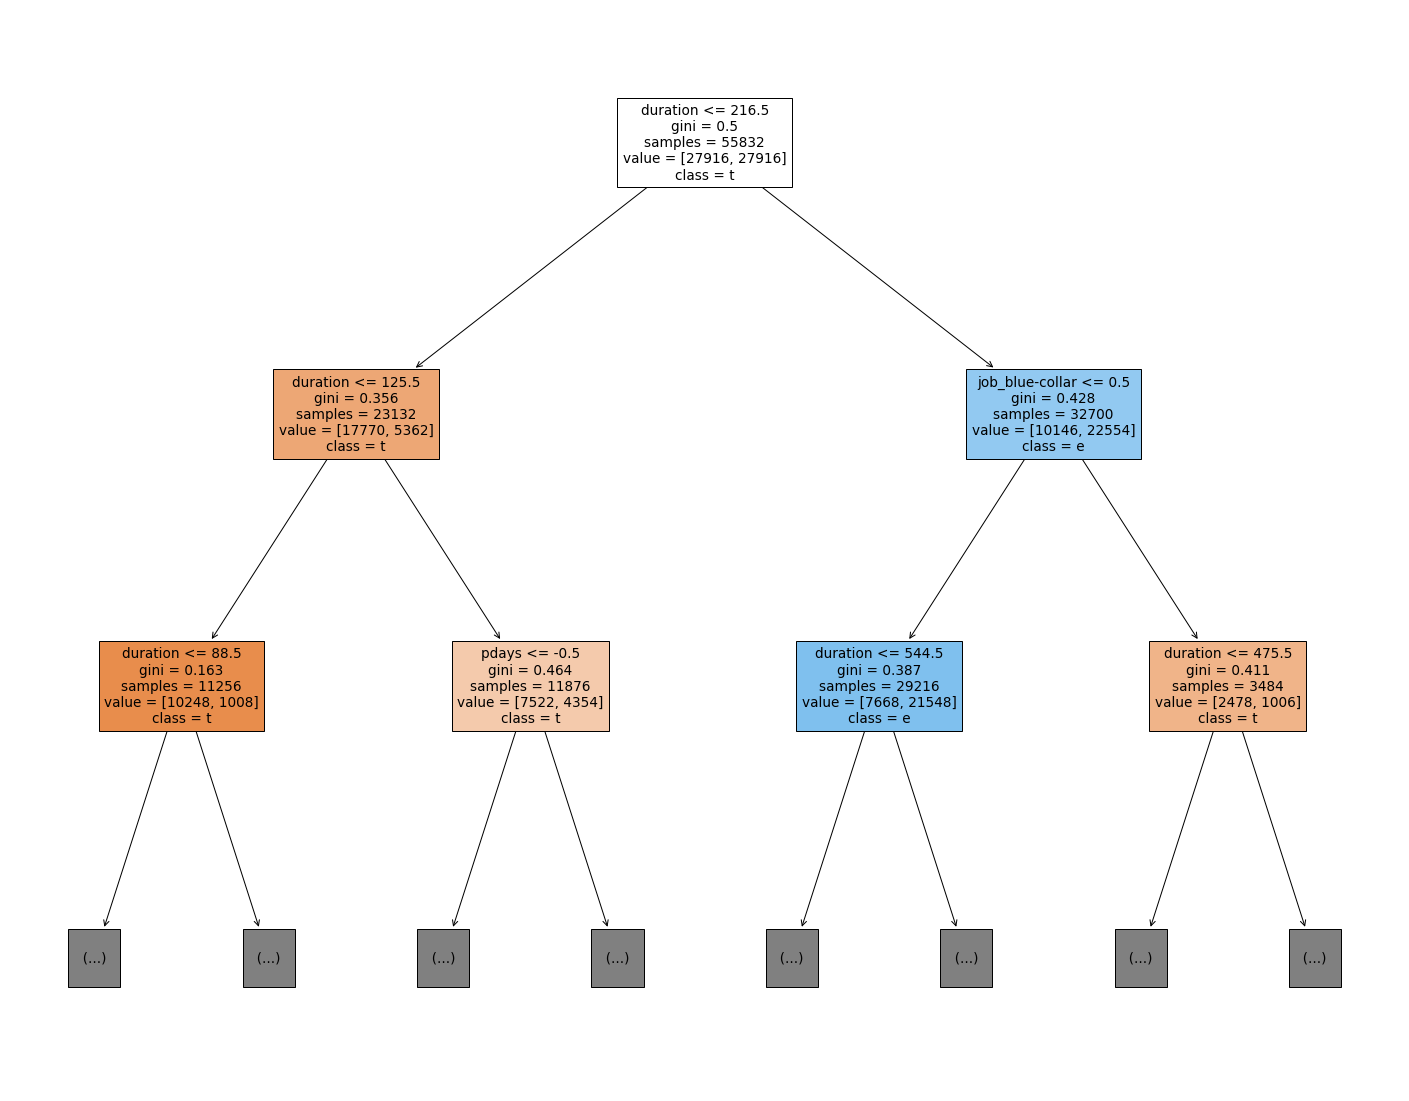

In [42]:
# just for demoing

from sklearn import tree

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(clf_tree, 
                   feature_names = list(X_train.columns),  
                   class_names = 'term_deposit',
                   max_depth = 2,
                   filled = True)

## Random Forest

## Training the model

In [43]:
# Random forest is an ensemble of decision tree algorithms. 
# It is an extension of bootstrap aggregation (bagging) of decision trees.

rf = RandomForestClassifier()

In [44]:
rf.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

## Making predictions

In [45]:
y_pred = rf.predict(X_test)
print(Counter(y_pred))

Counter({False: 12511, True: 1043})


## Evaluating the model 

In [46]:
accuracy_score(y_test, y_pred)


0.8860115095174856

In [47]:
# can also print a classification report for ever model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94     11978
        True       0.51      0.34      0.41      1576

    accuracy                           0.89     13554
   macro avg       0.72      0.65      0.67     13554
weighted avg       0.87      0.89      0.88     13554



## XGBoost

## Training the model

In [48]:
# The Gradient Boosting Machine is a powerful ensemble machine learning algorithm that uses decision trees. 
# Boosting is a general ensemble technique that involves sequentially adding models to the ensemble where subsequent models correct the performance of prior models.

xgb = XGBClassifier()

In [49]:
xgb.fit(X_train_SMOTE, y_train_SMOTE)

[15:56:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Making predictions

In [50]:
y_pred = xgb.predict(X_test)
print(Counter(y_pred))

Counter({False: 12335, True: 1219})


## Evaluating the model 

In [51]:
accuracy_score(y_test, y_pred)

# This outperfroms the Naive Bayes Model by 0.1% 

0.8877822045152722

In [52]:
# can also print a classification report for ever model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.95      0.94     11978
        True       0.52      0.40      0.46      1576

    accuracy                           0.89     13554
   macro avg       0.72      0.68      0.70     13554
weighted avg       0.88      0.89      0.88     13554



## Comparing the models

In [53]:
# model selection
models = []

# using Dummy Classifier as a baseline algorithm
models.append(('Dummy Classifier', DummyClassifier(strategy = 'stratified')))

# Logistic Regression
models.append(('Logistic Regression', LogisticRegression()))

# Naive Bayes
models.append(('Naive Bayes', GaussianNB()))

# Random Forest model
models.append(('Random Forest', RandomForestClassifier()))

# XGBoost
models.append(('XGBoost', XGBClassifier()))

In [54]:
# training every model and populating 

scoring_df = []

for name, model in models:
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        X_train = X_train_norm
    else:
        X_train = X_train_SMOTE
  
    model.fit(X_train, y_train_SMOTE)
    y_pred = model.predict(X_test)

    # the evaluation metrics for the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    scoring_dict = {'Model Name': name,
                    'Accuracy': round(accuracy, 4), 
                    'F1-Score': round(f1, 4), 
                    'Precision' : round(precision, 4), 
                    'Recall' : round(recall, 4), 
                    'AUC' : round(auc ,4)}

    scoring_df.append(scoring_dict)

[15:57:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Evaluation metrics for all models

In [55]:
scoring_df = pd.DataFrame(scoring_df)

scoring_df.sort_values(by = "F1-Score", ascending = False)

,Model Name,Accuracy,F1-Score,Precision,Recall,AUC
4,XGBoost,0.8878,0.4558,0.5226,0.4042,0.6778
3,Random Forest,0.8878,0.4139,0.5270,0.3407,0.6502
2,Naive Bayes,0.7077,0.2508,0.1786,0.4207,0.5831
1,Logistic Regression,0.1221,0.2094,0.1170,1.0000,0.5033
0,Dummy Classifier,0.5007,0.1970,0.1212,0.5266,0.5120


## Evaluating the Best Model

In [56]:
# the best model is the XGBoost model, which has the highest accuracy and f1-score
# should not accept models with AUC less than 0.5 

# train the best model 

best_model = XGBClassifier()
best_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = best_model.predict(X_test)
print(Counter(y_pred))

[15:57:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Counter({False: 12335, True: 1219})


In [57]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.95      0.92      0.94     12335
        True       0.40      0.52      0.46      1219

    accuracy                           0.89     13554
   macro avg       0.68      0.72      0.70     13554
weighted avg       0.90      0.89      0.89     13554



### ROC

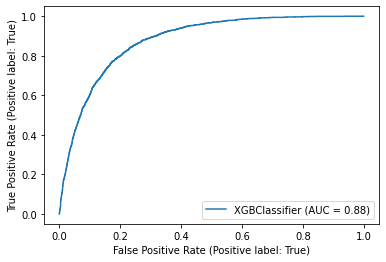

In [58]:
from sklearn.metrics import plot_roc_curve

# handy sklearn function to plot Receiver operating characteristic (ROC) curve, with the area under the curve.

plot_roc_curve(best_model,
               X_test, 
               y_test)  
plt.show()                     

# AUC of 0.89; the higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

### Precision Recall Curve

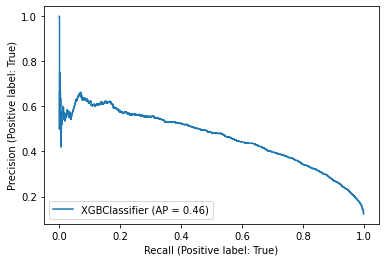

In [59]:
from sklearn.metrics import plot_precision_recall_curve

# Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. 
# In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.
# The precision-recall curve shows the tradeoff between precision and recall for different threshold. 

plot_precision_recall_curve(best_model,
                            X_test,
                            y_test)

plt.show();

# Balance between precision and recall could be higher

### Confusion Matrix

In [60]:
# A confusion matrix is a table that is often used to describe the performance of a classification model  on a set of test data for 
# which the true values are known. 

confusion_matrix(y_test, y_pred) 

array([[11396,   582],
       [  939,   637]])

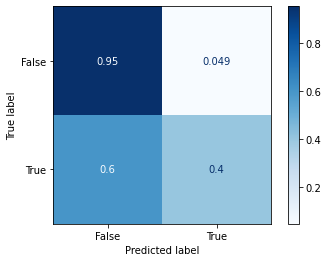

In [61]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues,
                      normalize = 'true')

plt.show();

# Only 41% of the true labels have been predicted correctly

### Feature Importance Plot

In [62]:
def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models"""
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f"Top {n} Features")
    plt.show()

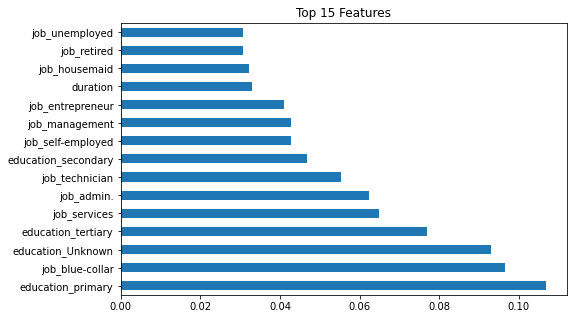

In [63]:
# plots feature importance - need to define number of features we are interested in
# to improve model performance, can remove redundant features

feature_importance_plot(best_model, X_train_SMOTE, 15)

### Learning Curves

In [64]:
def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation"""
    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = 'accuracy',
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Draw bands
    # plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
    # plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc = "best")
    plt.tight_layout()
    

    plt.show()

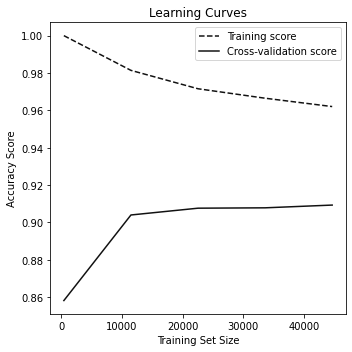

In [65]:
# A learning curve is a plot of model learning performance over experience or time. 
# Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. 

plot_learning_curves(best_model, X_train_SMOTE, y_train_SMOTE)


# A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.
# The loss of the model will almost always be lower on the training dataset than the validation dataset.
# This means that we should expect some gap between the train and validation loss learning curves. This gap is referred to as the “generalization gap.”

# Training the model on imbalanced dataset, some slight signs of overfitting - we need to generate more labels, without artifically creating data. 
# More data would not make a difference to the performance of the model, but different sampling techniques and more positive labels may.